In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D #für 3D Plots
from io import StringIO

In [56]:
#Iterationen
n = 10000
#konstanten
delta_t = 0.01

#Velocity
def x_func(x,y,sig=10):
    return sig*y

#Temperature
def y_func(x,y,z,r=28):
    return (r*x - x*z)

#Instability
def z_func(x,y,z,b=8/3):
    return x*y

#Erhaltungsgrößen
def h_func(y,z,r):
    return 0.5*y*y + 0.5*z*z - r*z

def c_func(x,z,sig):
    return 0.5*x*x - sig*z

In [67]:
def lorenz_kon (x_0=10,y_0=0,z_0=0,sig=10,r=28,b=8/3,flag=True,kind=...):
    X = np.zeros(n,dtype=np.float128)
    Y = np.zeros(n,dtype=np.float128)
    Z = np.zeros(n,dtype=np.float128)
    H = np.zeros(n,dtype=np.float128)
    C = np.zeros(n,dtype=np.float128)
    
    X[0] = x_0
    Y[0] = y_0
    Z[0] = z_0
    H[0] = h_func(y_0,z_0,r)
    C[0] = c_func(x_0,z_0,sig)
    
    i=1
    while(i<n):
        
        if (flag == True):
            X1 = x_func(X[i-1],Y[i-1],sig)
            Y1 = y_func(X[i-1],Y[i-1],Z[i-1],r)
            Z1 = z_func(X[i-1],Y[i-1],Z[i-1],b)

            X2 = x_func(X[i-1]+(delta_t*X1)/2.0,Y[i-1]+(delta_t*Y1)/2.0,sig)
            Y2 = y_func(X[i-1]+(delta_t*X1)/2.0,Y[i-1]+(delta_t*Y1)/2.0,Z[i-1]+(delta_t*Z1)/2.0,r)
            Z2 = z_func(X[i-1]+(delta_t*X1)/2.0,Y[i-1]+(delta_t*Y1)/2.0,Z[i-1]+(delta_t*Z1)/2.0,b)

            X3 = x_func(X[i-1]+(delta_t*X2)/2.0,Y[i-1]+(delta_t*Y2)/2.0,sig)
            Y3 = y_func(X[i-1]+(delta_t*X2)/2.0,Y[i-1]+(delta_t*Y2)/2.0,Z[i-1]+(delta_t*Z1)/2.0,r)
            Z3 = z_func(X[i-1]+(delta_t*X2)/2.0,Y[i-1]+(delta_t*Y2)/2.0,Z[i-1]+(delta_t*Z1)/2.0,b)

            X4 = x_func(X[i-1]+X3*delta_t,Y[i-1]+(delta_t*Y3),sig)
            Y4 = y_func(X[i-1]+X3*delta_t,Y[i-1]+(delta_t*Y3),Z[i-1]+(delta_t*Z3),r)
            Z4 = z_func(X[i-1]+X3*delta_t,Y[i-1]+(delta_t*Y3),Z[i-1]+(delta_t*Z3),b)

            X[i] = X[i-1] + (delta_t/6.0) * (X1 +2*X2 + 2*X3 + X4)
            Y[i] = Y[i-1] + (delta_t/6.0) * (Y1 +2*Y2 + 2*Y3 + Y4)
            Z[i] = Z[i-1] + (delta_t/6.0) * (Z1 +2*Z2 + 2*Z3 + Z4)
        else:
            X[i] = X[i-1] + delta_t * x_func(X[i-1],Y[i-1],sig)
            Y[i] = Y[i-1] + delta_t * y_func(X[i-1],Y[i-1],Z[i-1],r)
            Z[i] = Z[i-1] + delta_t * z_func(X[i-1],Y[i-1],Z[i-1],b)
        
        
        H[i] = h_func(Y[i],Z[i],r)
        C[i] = c_func(X[i],Z[i],sig)
        i += 1
    
    print(H)
    plot_lorenz (X,Y,Z,sig,b,r,n,delta_t,"Euler Einschritt",factor=3)
    plot_erhaltung2(H[0:1000],C[0:1000])

In [68]:
def plot_xyz(X,Y):
    fig, ax = plt.subplots(figsize=(15,13))
    ax.plot(X,Y,'b-',lw=0.9)
    ax.set_xlim(-25,25)
    ax.set_ylim(-30,32)
    ax.set_xlabel('Geschwindigkeit')
    ax.set_ylabel('Temperatur')
    plt.show()
    
def plot_lorenz (X,Y,Z,sig,b,r,n,dt,kind,factor=4):

    #fig = plt.figure(figsize=(15,13))
    fig = plt.figure(figsize=(15*factor,13*factor))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X, Y, Z)
    ax.scatter(X[np.size(X)-1], Y[np.size(X)-1], Z[np.size(X)-1], s=200*factor,c='r', marker='o', lw=2.0*factor)#, depthshade=True)
    ax.scatter(X[0], Y[0], Z[0], s=200*factor,c='m', marker='x', lw=2.0*factor)
    plt.annotate("Lorenz – Modell", xy=(0.43, 0.95), xycoords='axes fraction',fontsize=18*factor)
    text1 = r"Prandtl-Zahl ($\sigma$) : %.1f" % (sig)
    text2 = "Aspekt-Zahl (b) : %.1f" % (b)
    text3 = "Rayleigh-Zahl (r) : %.1f" % (r)     
    plt.annotate(text1, xy=(0.01, 0.9), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate(text2, xy=(0.01, 0.86), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate(text3, xy=(0.01, 0.82), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate("Verfahren: " + kind, xy=(0.01, 0.1), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate("Anzahl: " + str(n), xy=(0.01, 0.06), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate("Timesteps: " + str(dt), xy=(0.01, 0.02), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate("Anfangspunkt: magenta Kreuz", xy=(0.71, 0.9), xycoords='axes fraction',fontsize=14*factor)
    plt.annotate("Endpunkt: rotes Kreuz", xy=(0.71, 0.87), xycoords='axes fraction',fontsize=14*factor)
    ax.set_xlim3d(-25,25)
    ax.set_ylim3d(-30,30)
    ax.set_zlim3d(0,55)
    ax.set_xlabel('Geschwindigkeit')
    ax.set_ylabel('Temperatur')
    ax.set_zlabel('Temperaturschichtung')
    ax.legend()
    #plt.show()
    plt.savefig("lorenz_" + kind + ".png")
    
def plot_erhaltung1(H,C):
    fig, ax = plt.subplots(figsize=(15,13))
    x=np.arange(0,np.size(H),1)
    
    ax.plot(x,H,'b-',label='H',lw=0.9)
    ax.plot(x,C,'r-',label='C',lw=0.9)
    
    y = np.zeros(np.size(x[7300:7800]))-395
    ax.plot(x[7300:7800],y,'g-',lw=1.9)
    y = np.zeros(np.size(x[1860:1990]))-100
    ax.plot(x[1860:1990],y,'g-',lw=1.9)
    
    ax.legend()
    plt.title("Erhaltungsgrößen des konservativen Anteils")
    plt.show()
    #plt.close()
    
def plot_erhaltung2(H,C):
    x=np.arange(0,np.size(H),1)
    plt.figure(figsize=(15,13))
    plt.suptitle("Erhaltungsgrößen des konservativen Anteils")
    plt.subplot(211)
    plt.title("H")
    plt.plot(x,H,'b-',label='H',lw=0.9)

    plt.subplot(212)
    plt.title("C")
    plt.plot(x,C,'r-',label='C',lw=0.9)
    plt.legend()
    
    plt.show()

No handles with labels found to put in legend.


[0.00000000e+00 4.17015285e-08 1.65843418e-07 ... 2.14069288e-04
 2.14064434e-04 2.14147859e-04]


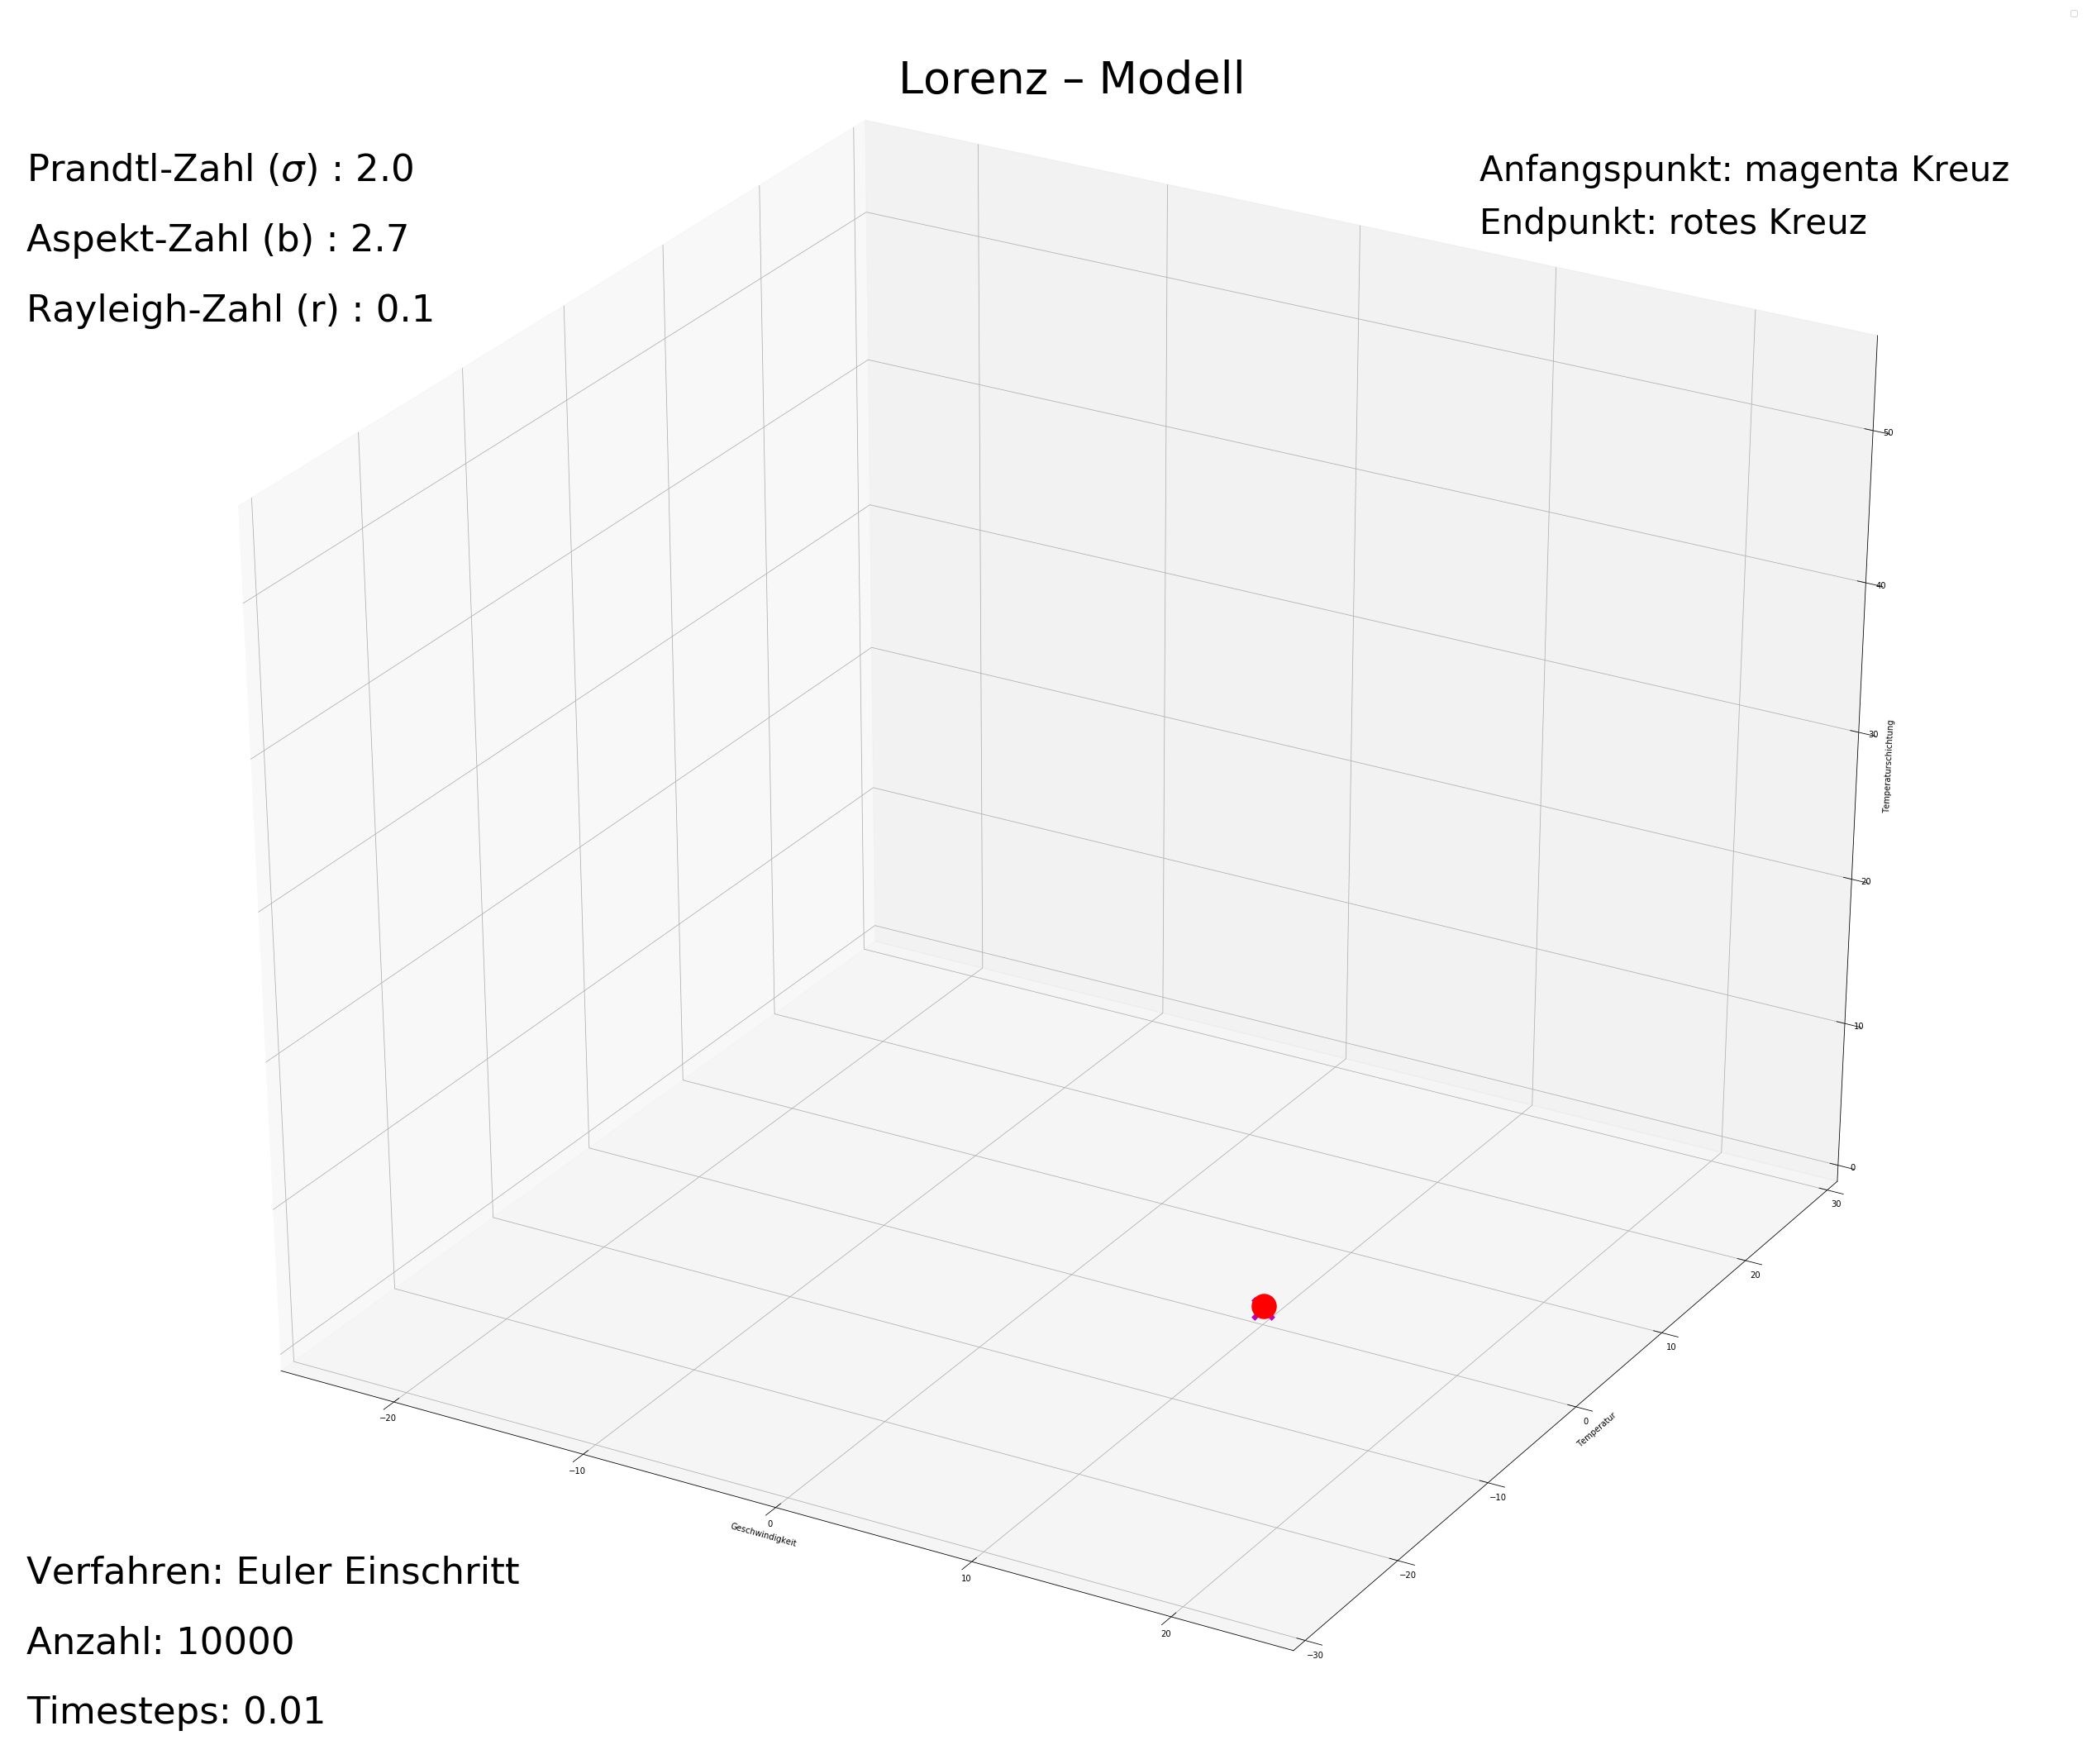

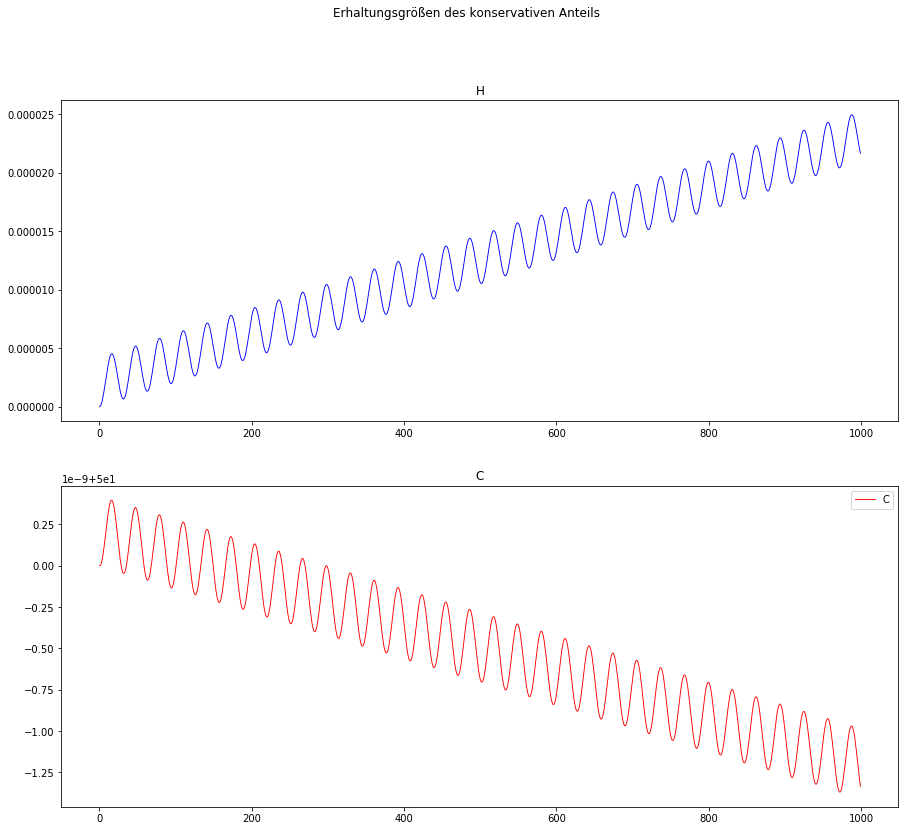

In [69]:
lorenz_kon(sig=2,r=0.1)

No handles with labels found to put in legend.


[0.00000000e+00 4.15649558e-04 1.74779876e-03 ... 9.29606814e+01
 9.29930461e+01 9.30502949e+01]


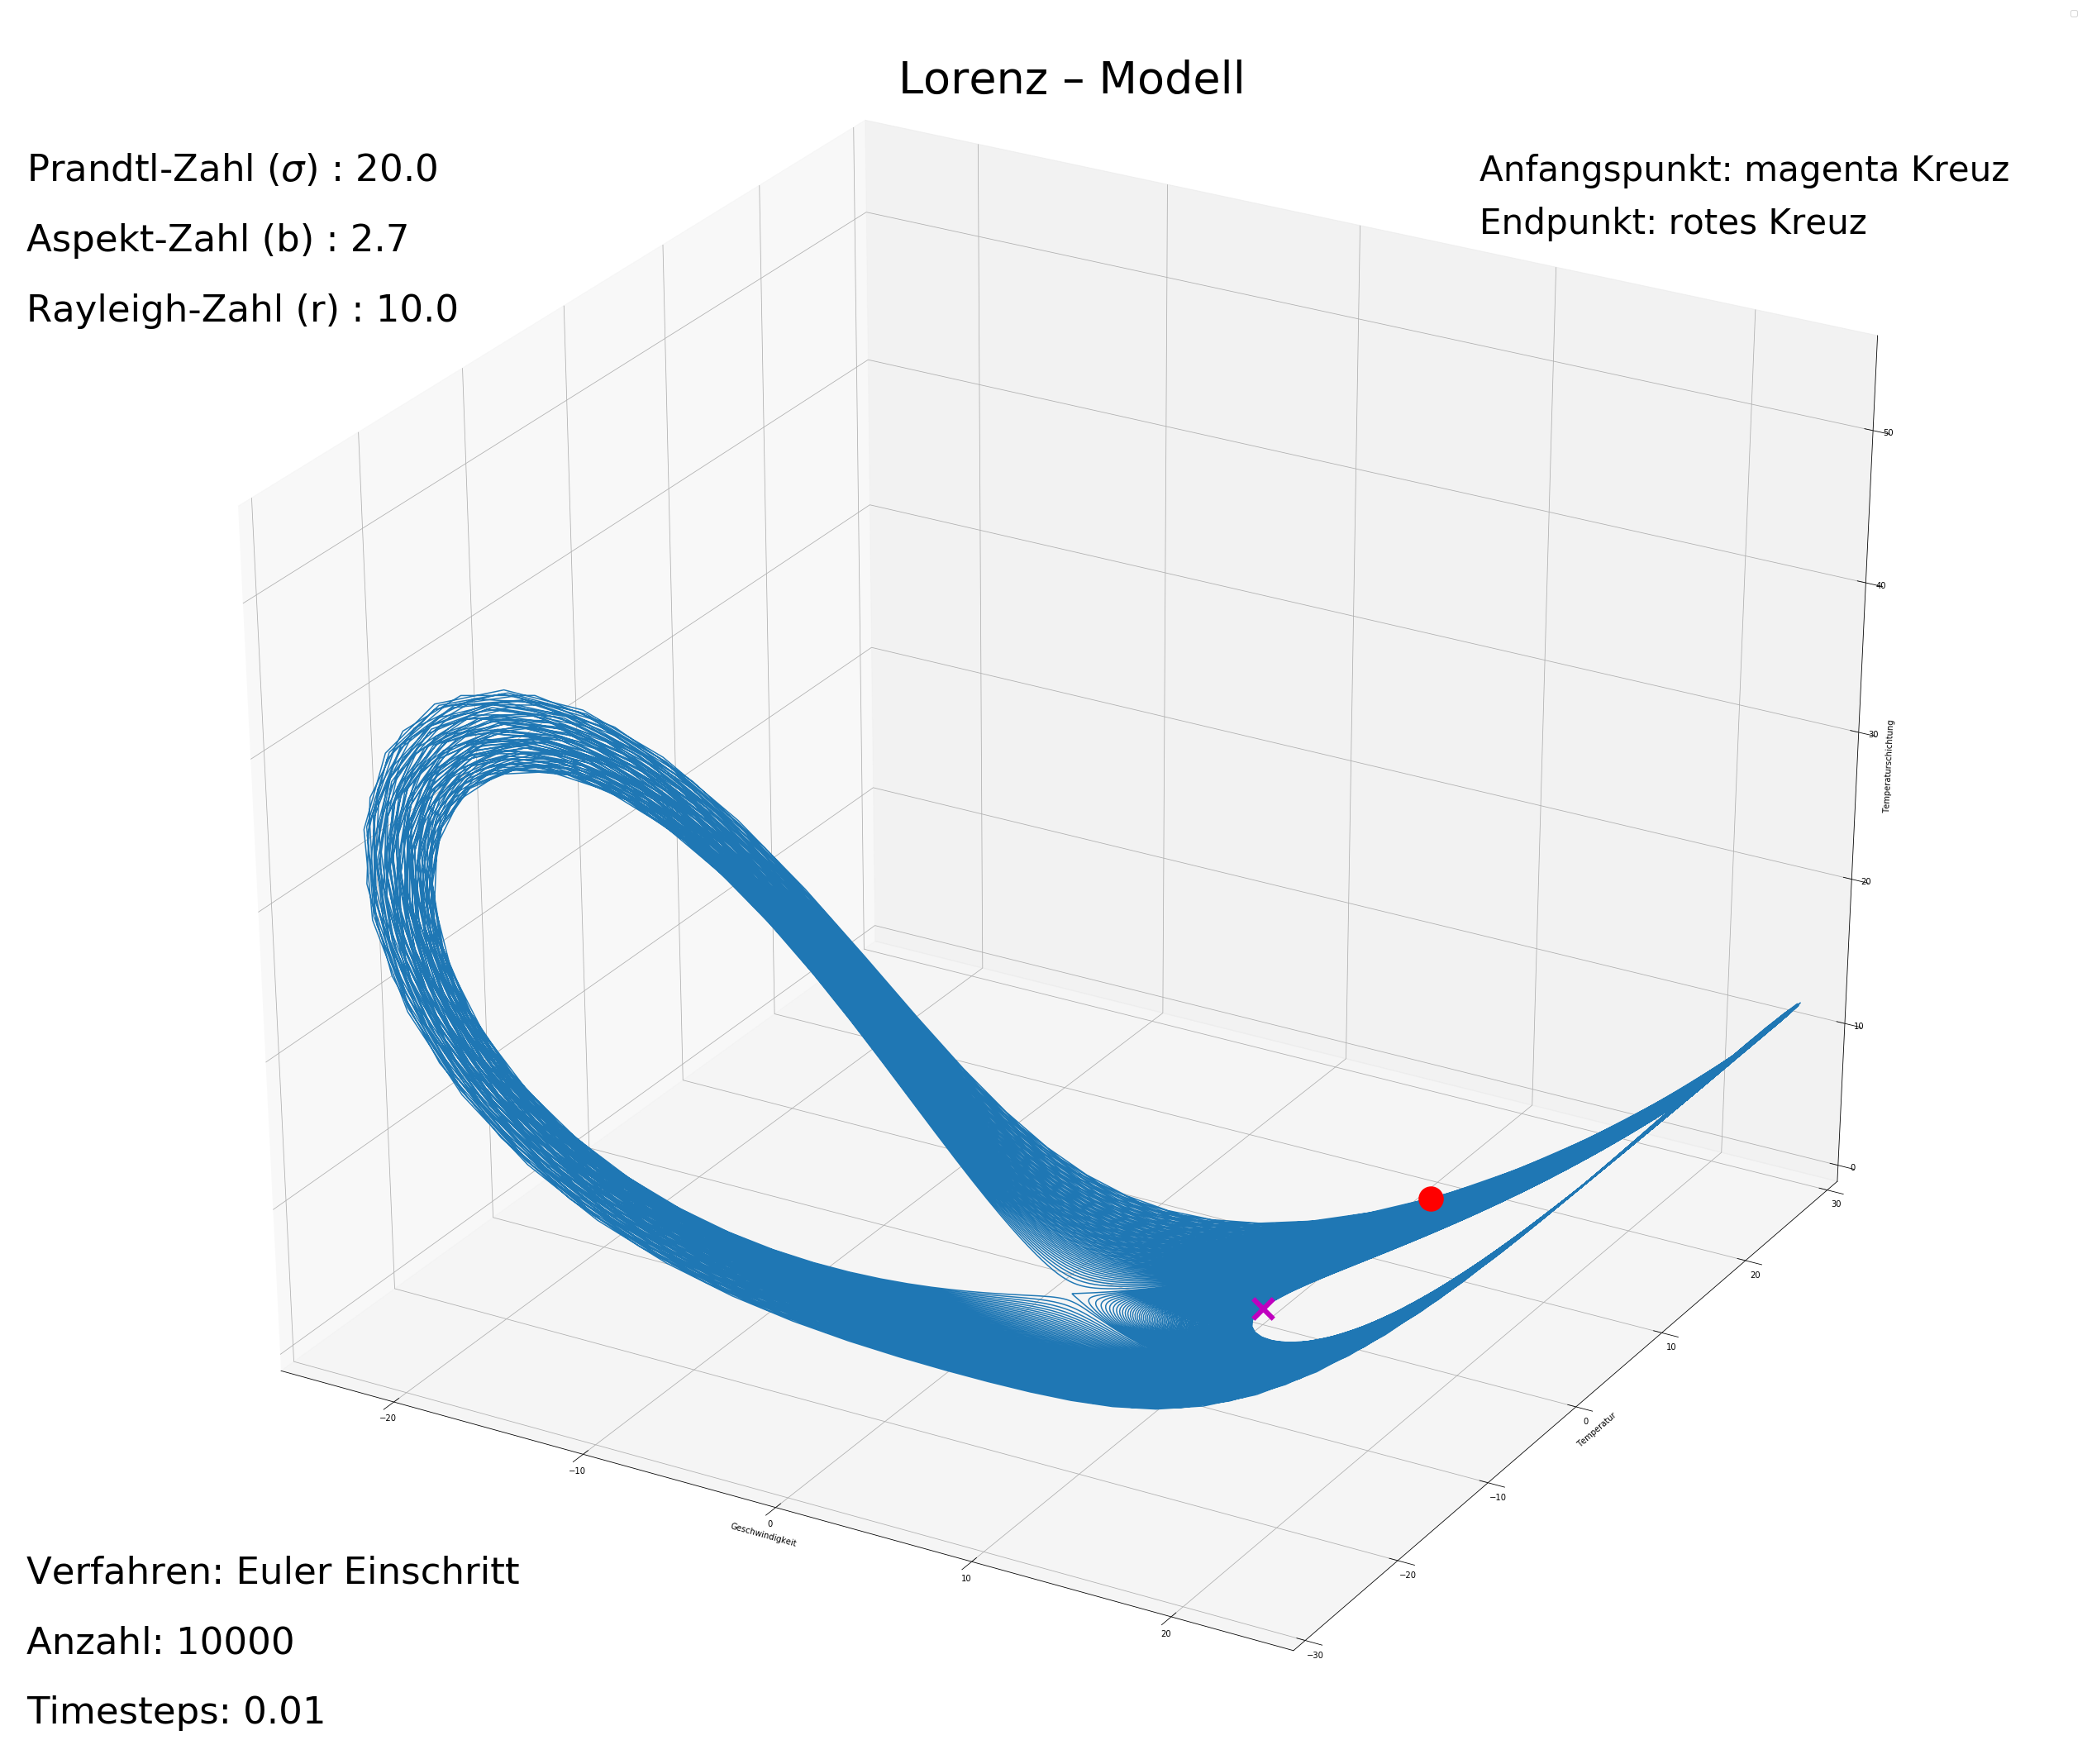

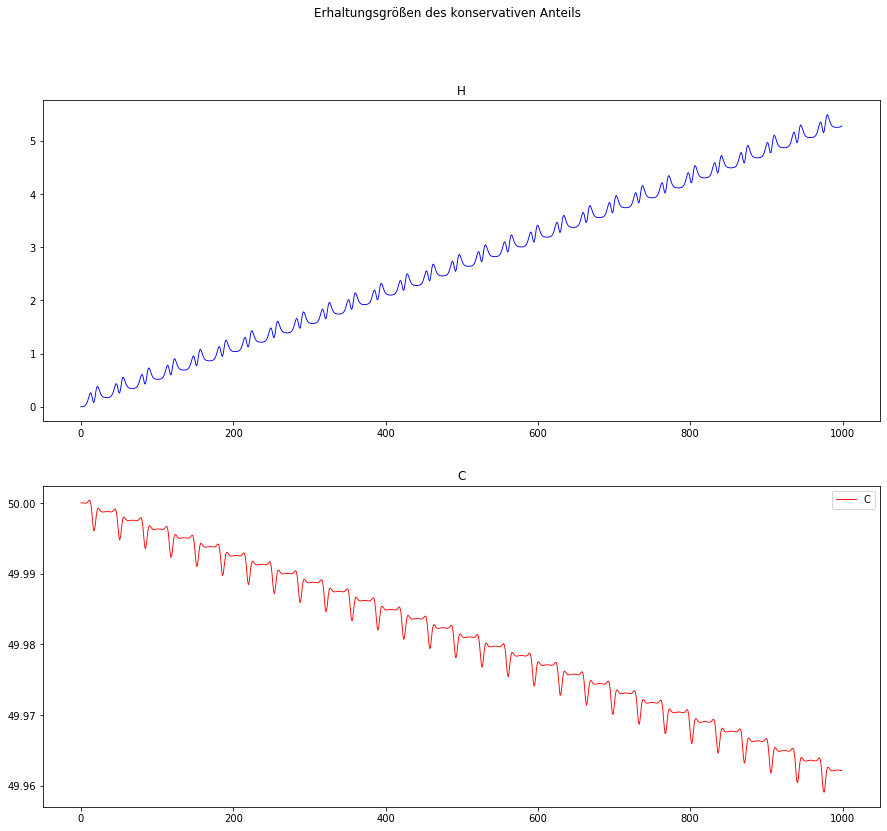

In [73]:
lorenz_kon(sig=20,r=10)